## 1.  Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data_kaggle.xls')

In [3]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [4]:
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
Location         53883 non-null object
Price            53635 non-null object
Rooms            52177 non-null object
Bathrooms        51870 non-null float64
Car Parks        36316 non-null float64
Property Type    53858 non-null object
Size             52820 non-null object
Furnishing       46953 non-null object
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Location,object,0,0.00,112,"[Other, Kuala Lumpur, Gombak, Kuala Lumpur]"
1,Price,object,248,0.46,4280,"[RM 7,180,000, RM 951,600]"
2,Rooms,object,1706,3.17,43,"[3, 9+1]"
3,Bathrooms,float64,2013,3.74,17,"[14.0, 16.0]"
4,Car Parks,float64,17567,32.60,21,"[16.0, 6.0]"
5,Property Type,object,25,0.05,99,"[2-sty Terrace/Link House (Corner), 4-sty Terr..."
6,Size,object,1063,1.97,6190,"[Land area : 10387 sq. ft., Land area : 22&#21..."
7,Furnishing,object,6930,12.86,4,"[nan, Partly Furnished]"


## 2. Data Cleaning

### 2.1 Handle Missing Value

In [7]:
df.dropna(subset=['Price','Rooms','Bathrooms','Property Type','Size','Furnishing'],inplace=True)
df.drop(['Car Parks'],axis=1,inplace=True)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Location,object,0,0.0,98,"[Taman Melawati, Kuala Lumpur, Jalan Kuching, ..."
1,Price,object,0,0.0,3634,"[RM 2,716,200, RM 4,286,400]"
2,Rooms,object,0,0.0,43,"[4+2, 14]"
3,Bathrooms,float64,0,0.0,17,"[10.0, 7.0]"
4,Property Type,object,0,0.0,94,"[Residential Land (Intermediate), Apartment (P..."
5,Size,object,0,0.0,5427,"[Built-up : 4,123 sq. ft., Land area : 3926 sq..."
6,Furnishing,object,0,0.0,4,"[Partly Furnished, Unknown]"


### 2.2 Location Colomn

> Location Selection, only select location which has a value counts more than 100

In [8]:
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].str.replace(', kuala lumpur','')

In [9]:
len(sorted(df['Location'].unique()))

97

In [10]:
vc_location = df['Location'].value_counts()
list_location_to_remove = vc_location[vc_location < 100].index
index_to_remove = df.loc[np.isin(df["Location"], list_location_to_remove)].index
df.drop(index_to_remove , inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
len(df['Location'].value_counts())

48

### 2.3 Price Colomn Cleaning

> Formatting the Price

In [12]:
df['Price'] = df['Price'].str.replace('RM ', '')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])

> Handle Outlier Data With IQR Method

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df["Price"].describe()

count        44636.00000
mean       1787142.44146
std        7958177.81104
min            308.00000
25%         598000.00000
50%         999999.50000
75%        1930000.00000
max     1600000000.00000
Name: Price, dtype: float64

In [15]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit
id_to_drop,upper,lower = check_outlier(df,'Price')
df.drop(id_to_drop,inplace=True)

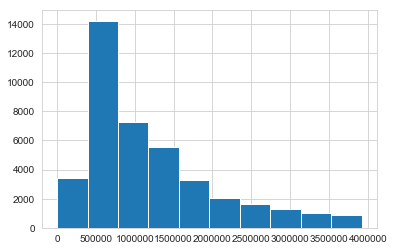

In [16]:
df['Price'].hist()

### 2.4 Rooms Colomn Cleaning

In [17]:
df['Rooms'][0:5]

0    2+1
2      3
3    4+1
5      5
6    4+1
Name: Rooms, dtype: object

> Convert Room

In [18]:
import re

In [19]:
def convert_room(rooms):
        if rooms.endswith("+"):
            return int(rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return rooms

In [20]:
df['Rooms'] = pd.to_numeric(df['Rooms'].apply(convert_room))

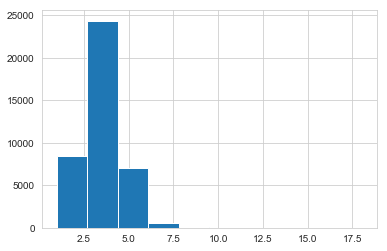

In [21]:
df['Rooms'].hist()

### 2.5 Handling Bathrooms Colomn 

In [22]:
def to_int(x):
    return int(x)

In [23]:
df['Bathrooms'] = df['Bathrooms'].apply(to_int)

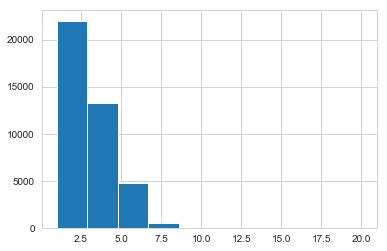

In [24]:
df['Bathrooms'].hist()

### 2.6 Handling Property Type

In [25]:
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium", 
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse", 
        "Flat", "Residential Land", "Cluster House"]
    for super_type in super_types:
        if re.search(super_type, prop_type, flags=re.IGNORECASE) is not None:
            return super_type
    
    return prop_type

In [26]:
df['Property Type Group'] = df['Property Type'].apply(simplify_property_type)

In [27]:
df['Property Type Group'].value_counts()

Condominium            18986
Serviced Residence     11032
Terrace/Link House      6289
Semi-detached House     1458
Apartment               1324
Bungalow                 743
Townhouse                441
Flat                     232
Residential Land          13
Cluster House              5
Name: Property Type Group, dtype: int64

> Deleting the data with Property type group Residental Land and Cluster House, because this group too small

In [28]:
df.drop(df[(df['Property Type Group'] == 'Residential Land') | (df['Property Type Group'] == 'Cluster House')].index,inplace=True)

### 2.7 Size Colomn

In [29]:
def size_type(size):
    size = size.split(':')
    size_type = size[0]
    return size_type

def size_num(size):
    size = size.split(':')
    size_num = size[1]
    size_num = size_num.replace(' sq. ft.','')
    size_num = size_num.lower()
    size_num = size_num.replace(' ','')
    size_num = size_num.replace('sf','')
    if 'x' in size_num:
        num = size_num.split('x')
        try:
            return int(num[0]) * int(num[1])
        except:
            return None
    try:
        return int(size_num.replace(',',''))
    except:
        return None

In [30]:
df['Size Type'] = df['Size'].apply(size_type)

In [31]:
df['Size Num'] = df['Size'].apply(size_num)

> Outlier Checking

In [32]:
df['Size Num'].describe()

count      40210.00000
mean        3617.94332
std       230404.95272
min            0.00000
25%          990.00000
50%         1328.00000
75%         1876.00000
max     40232000.00000
Name: Size Num, dtype: float64

In [33]:
df.drop(df[df['Size Num'] < 100].index,inplace=True)
index,upper,lower= check_outlier(df,'Size Num')
df.drop(index,inplace=True)
df.dropna(inplace=True)

In [34]:
df.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Property Type Group,Size Type,Size Num
0,klcc,1250000,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Serviced Residence,Built-up,1335.00000
2,dutamas,1030000,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Condominium,Built-up,1875.00000
3,bukit jalil,900000,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Condominium,Built-up,1513.00000
6,taman tun dr ismail,1950000,5,4,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,Terrace/Link House,Land area,1875.00000
7,sri petaling,385000,3,2,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,Apartment,Built-up,904.00000


### 2.8 Furnishing Colomn Handling

In [35]:
df['Furnishing'].value_counts()

Partly Furnished    19492
Fully Furnished     11773
Unfurnished          4379
Unknown               370
Name: Furnishing, dtype: int64

## 3.  Modelling

### 3.1 First Modelling

In [36]:
from sklearn.model_selection import KFold

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
x = df[['Location','Rooms','Bathrooms','Furnishing','Property Type Group','Size Type','Size Num']]
y = df['Price']

In [39]:
x = pd.get_dummies(x,drop_first=True)

In [40]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor]
    for item in models:
        rmse = []
        mae = []
        kf = KFold(n_splits=n_cv,shuffle=True)
        for train_index , test_index in kf.split(x,y):
            X_train,X_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))

        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv
        ]
        score.append(temp)
    return pd.DataFrame(score,columns=['MAE','RMSE'],index=model_name)

In [41]:
# regression_model(5)

### 3.2 Second Modelling

In [42]:
x_y = df[['Location','Rooms','Bathrooms','Furnishing','Property Type Group','Size Type','Size Num','Price']]
x_y = x_y[x_y['Price'] < 1200000]

In [43]:
x_y = x_y[x_y['Price'] > 20000]

In [44]:
x_y = x_y.drop(x_y[x_y['Furnishing'] == 'Unknown'].index)
x = x_y.drop(['Price'],axis=1)
y = x_y['Price']


In [45]:
x =pd.get_dummies(x,drop_first=True)

In [46]:
# regression_model(5)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test, y_train,y_test = train_test_split(x,y)

In [49]:
model = RandomForestRegressor()

In [50]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
prediction = model.predict(X_test)

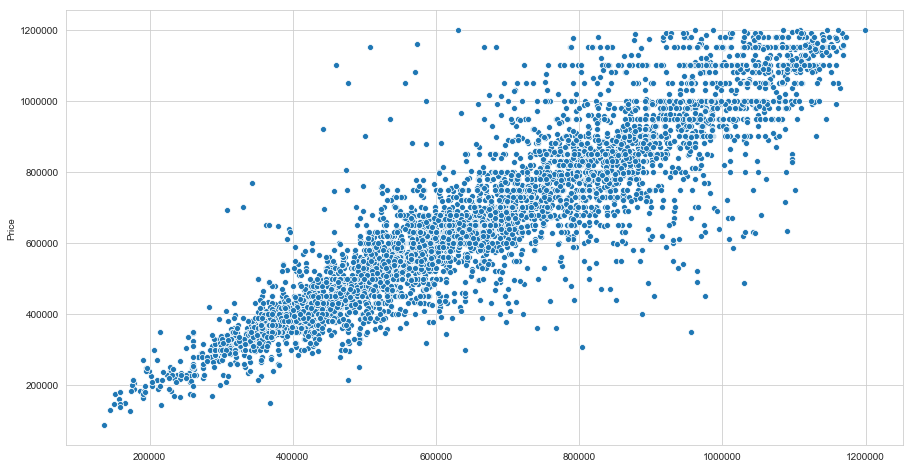

In [52]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction,y_test)

In [53]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])

In [54]:
df_prediction.sort_values(by='Selisih',ascending=False)

,y_true,y_pred,Selisih
9923,1150864,507102.22222,643761.77778
9073,1100000,460600.00000,639400.00000
40383,350000,955552.75833,605552.75833
4380,1160000,573890.00000,586110.00000
35575,1050000,477700.00000,572300.00000
7424,1199494,630164.62204,569329.37796
15847,488000,1030000.00000,542000.00000
19834,450000,975475.10101,525475.10101
13147,1080000,570763.80952,509236.19048
39875,308000,803920.00000,495920.00000


In [55]:
mean_absolute_error(y_test,prediction)

60022.69845758582

In [56]:
r2_score(y_test,prediction)

0.8485389569903663

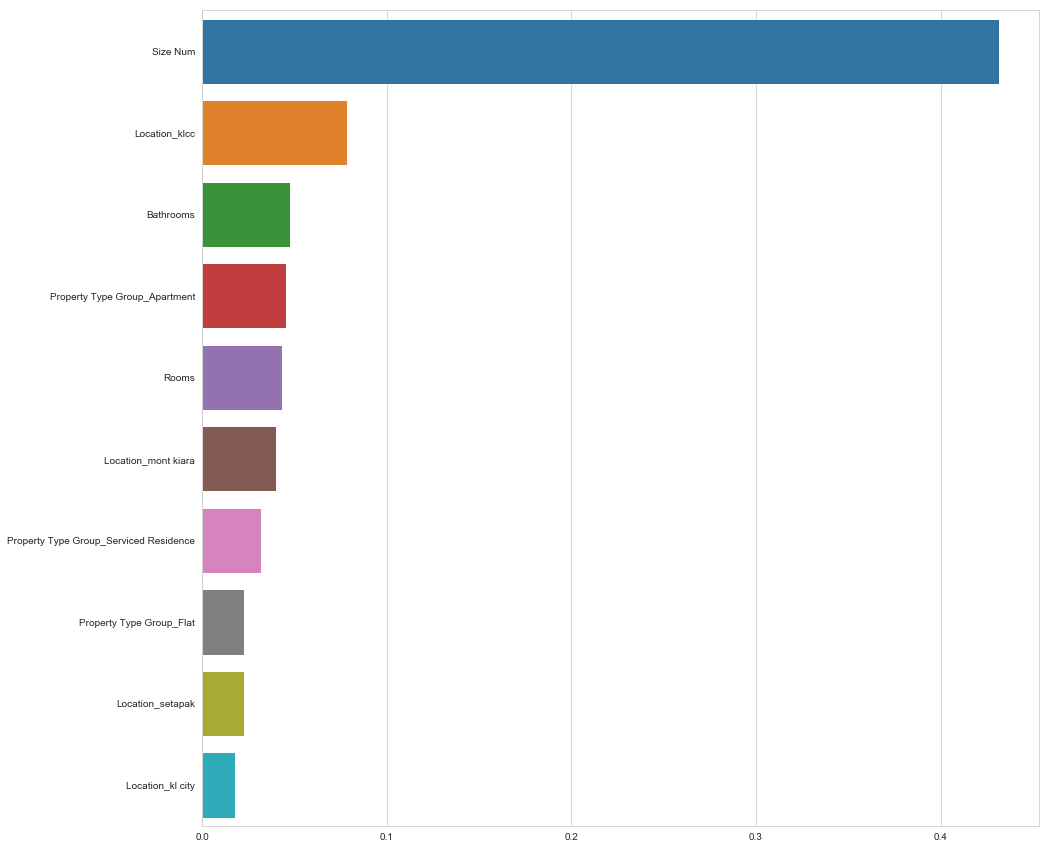

In [57]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

## Export Model

In [58]:
import pickle

In [59]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
x_y.columns

Index(['Location', 'Rooms', 'Bathrooms', 'Furnishing', 'Property Type Group',
       'Size Type', 'Size Num', 'Price'],
      dtype='object')

In [61]:
filename = 'x_dummies_colomn.sav'
pickle.dump(x.columns, open(filename , 'wb'))

In [62]:
filename = 'real_colomn.sav'
pickle.dump(x_y.drop('Price',axis=1).columns, open(filename , 'wb'))

In [65]:
x_y.columns

Index(['Location', 'Rooms', 'Bathrooms', 'Furnishing', 'Property Type Group',
       'Size Type', 'Size Num', 'Price'],
      dtype='object')